In [1]:
import numpy as np
import matplotlib.pyplot as plt
from Modulos.modulos_auxiliares import *



has_valid_data serve para ver se o numero de superfice dos voxeis é maior do que 1

get_node1 e get_node2 da pra fazer com os nós da função do pyvane, acho que a função de simplificação com adaptação da pra fazer isso ai



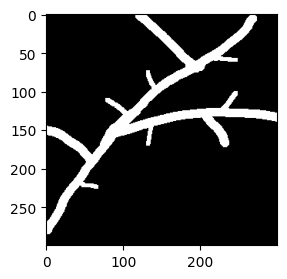

In [2]:
img = plt.imread('Vaso_amao.png')
img = (1 - img).astype(np.uint8)
img = transform_rgb_to_gray(img)

# print('Valores unicos:', np.unique(img))
# print(im.Image(img))

plt.figure(figsize = (3,3))
plt.imshow(img, 'gray')

In [3]:
img_skel = np.array((skimage.morphology.skeletonize(img, method = 'lee')))
#plt.imshow(merge_image(img, img_skel))

### TIP RADIUS AQUI

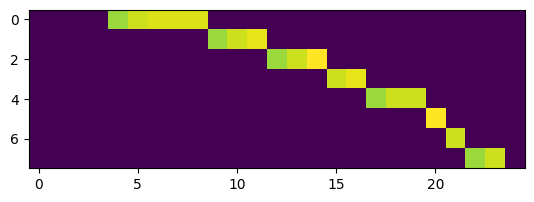

In [4]:
## Nessa etapa foi feito o calculo de distancia euclidiana dos valores internos a imagem para ver qual a
## distancia entre os pixeis do vaso para a borda do vaso, assim, conseguimos saber a distancia do esqueleto para
## a borda do vaso, em outras palavras, o tip_radius apresentado no artigo do voreen
img_distance = np.zeros(img.shape, dtype = np.uint8)

# calculando a trasnformada a distancia de euclides sobre a imagem original
img_distance, indices = distance(img, return_indices = True)

# criando uma variavel de saida
img_skel_distance = np.zeros(img.shape)

# armazenando os pixeis do esqueleto
row, col = np.nonzero(img_skel)

# armazenando o valor da trasnformada a distancia no pixel do esqueleto
img_skel_distance[row, col] = img_distance[row, col]

# mostrando em forma matricial e na imagem
plt.imshow(img_skel_distance[152:160, 0:25])
#print(img_skel_distance[152:160, 0:25])

In [5]:
print(np.max(img_skel_distance))
print(img_skel_distance.dtype)

10.770329614269007
float64


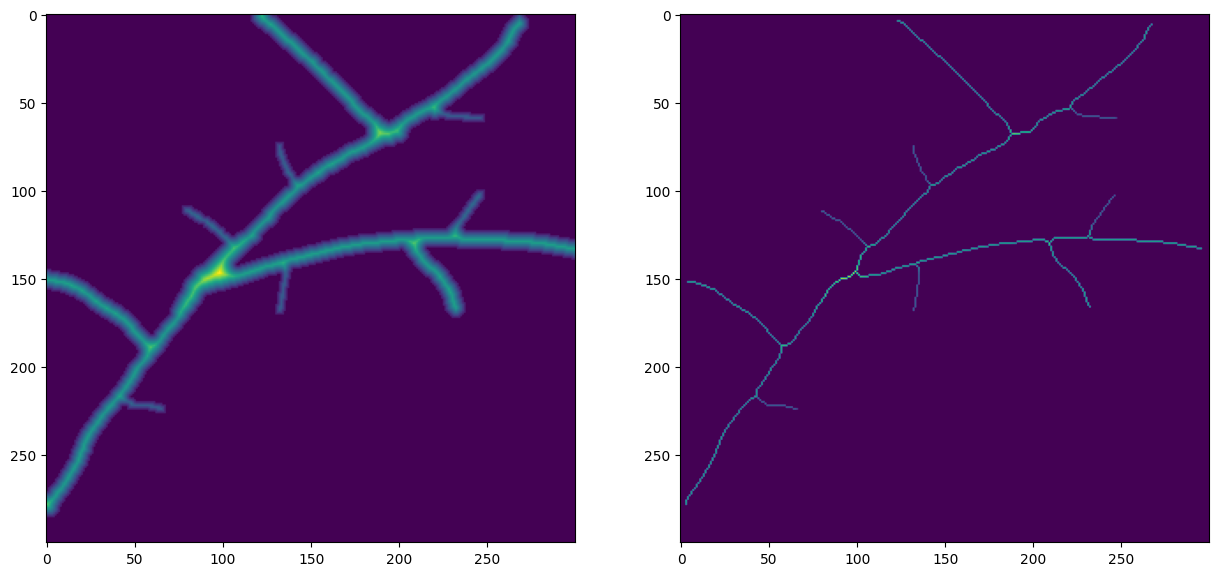

In [6]:
#print(img__[145:160, 0:25])
# mostrando a transformada a distancia
plt.figure(figsize = (15, 15))
plt.subplot(121)
plt.imshow(img_distance)
plt.subplot(122)
plt.imshow(img_skel_distance)

In [7]:
print(np.max(img_distance))

10.770329614269007


In [8]:
graph_skeleton = creation.create_graph(im.Image(img_skel))
graph_skel2 = ad.simplify(graph_skeleton)
graph_skel3 = ad.adjust_graph(graph_skel2, 0)

In [9]:
node_att = graph_skel3.nodes(data = True)
node_att[0]['radius']=10

In [10]:
node_att[0]

{'pixels': [(53, 221)],
 'center': (53, 221),
 'type': 0,
 'ndim': 2,
 'branches': [(54, 220), (54, 222), (52, 221)],
 'old_id': 0,
 'radius': 10}

In [11]:
for node in graph_skel3.nodes:
    node_pos = node_att[node]['center']
    node_dist = img_skel_distance[node_pos]
    node_att[node]['radius'] = node_dist

In [12]:
graph_skel3.nodes(data = True)

NodeDataView({0: {'pixels': [(53, 221)], 'center': (53, 221), 'type': 0, 'ndim': 2, 'branches': [(54, 220), (54, 222), (52, 221)], 'old_id': 0, 'radius': 6.082762530298219}, 1: {'pixels': [(68, 188)], 'center': (68, 188), 'type': 0, 'ndim': 2, 'branches': [(69, 187), (67, 187), (68, 189)], 'old_id': 1, 'radius': 8.0}, 2: {'pixels': [(97, 142)], 'center': (97, 142), 'type': 0, 'ndim': 2, 'branches': [(97, 143), (98, 141), (96, 141)], 'old_id': 2, 'radius': 6.0}, 3: {'pixels': [(126, 231)], 'center': (126, 231), 'type': 0, 'ndim': 2, 'branches': [(127, 230), (127, 232), (125, 232)], 'old_id': 3, 'radius': 7.0}, 4: {'pixels': [(130, 209)], 'center': (130, 209), 'type': 0, 'ndim': 2, 'branches': [(129, 210), (131, 209), (129, 208)], 'old_id': 4, 'radius': 7.615773105863909}, 5: {'pixels': [(132, 106)], 'center': (132, 106), 'type': 0, 'ndim': 2, 'branches': [(132, 107), (133, 105), (131, 105)], 'old_id': 5, 'radius': 7.0}, 6: {'pixels': [(142, 133)], 'center': (142, 133), 'type': 0, 'ndim'

In [13]:
graph_skel3.edges(data = True)

MultiEdgeDataView([(0, 1, {'path': [(54, 220), (54, 219), (54, 218), (54, 217), (55, 216), (55, 215), (55, 214), (55, 213), (56, 212), (56, 211), (57, 210), (57, 209), (58, 208), (59, 207), (59, 206), (60, 205), (60, 204), (61, 203), (62, 202), (63, 202), (64, 201), (65, 200), (66, 199), (67, 198), (67, 197), (67, 196), (67, 195), (67, 194), (67, 193), (68, 192), (68, 191), (68, 190), (68, 189)], 'length': 37.38477631085023, 'is_branch': False}), (0, 12, {'path': [(54, 222), (55, 223), (56, 224), (57, 225), (57, 226), (57, 227), (58, 228), (58, 229), (58, 230), (58, 231), (58, 232), (58, 233), (58, 234), (58, 235), (58, 236), (58, 237), (59, 238), (59, 239), (59, 240), (59, 241), (59, 242), (59, 243), (59, 244), (59, 245), (59, 246)], 'length': 26.071067811865476, 'is_branch': True}), (0, 11, {'path': [(52, 221), (51, 222), (50, 222), (49, 223), (48, 224), (48, 225), (47, 226), (46, 227), (46, 228), (45, 229), (44, 230), (43, 231), (42, 232), (42, 233), (41, 234), (40, 235), (39, 236),

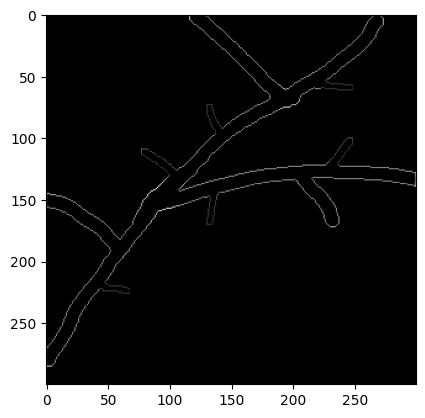

In [14]:
# Calculando a transformada a distancia do esqueleto para o restante da imagem e retornando seus 
# indices da distancia
img_dist, index = distance(1-img_skel, return_indices=True)

# Criando um vetor para armazenar as distancias das bordas para o esqueleto
img_dist_edge = np.zeros(img.shape, dtype = np.uint8)

# operação de erosão para analisar os pixeis de borda
img_borda = img - ndi.binary_erosion(img)

# Identificando os pixeis da borda
row, col = np.nonzero(img_borda)

# armazenando o valor da trasnformada do esqueleto para as bordas
img_dist_edge[row, col] = img_dist[row, col]

# visualizando
plt.figure()
plt.imshow(img_dist_edge, 'gray')

In [15]:
# Celula opcional
# verificando os pixeis de distancia dos pixeis do esqueleto
print(np.max(img_dist_edge), np.min(img_dist_edge))

print(np.unique(img_dist_edge))

print(row, col)

10 0
[ 0  1  2  3  4  5  6  7  8  9 10]
[  0   0   0 ... 285 285 285] [116 117 118 ...   2   3   4]


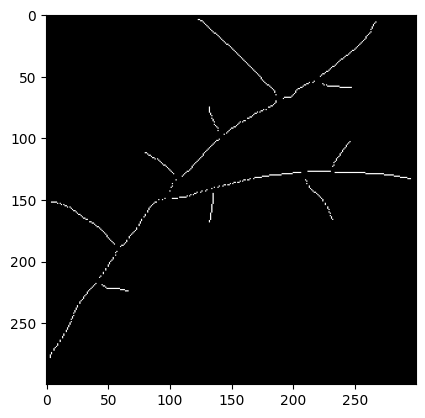

In [16]:
# Identificando as linhas e colunas da distancia
rows, cols = index[0,row,col], index[1, row, col]

dist_index = np.zeros(img.shape, dtype = np.uint8)
# com base nos indices da trasnformada distancia do esqueleto para as bordas
# montamos uma nova imagem de demosntração dos pixeis que estao conectados da distancia
dist_index[rows, cols] = 1
plt.figure()
plt.imshow(dist_index, 'gray')

Vemos então na imagem anterior que temos pixeis nas bifurcações que não estao associados a distancia calculada, mas focaremos nos pixeis das bifurcações para calcular o raio interno

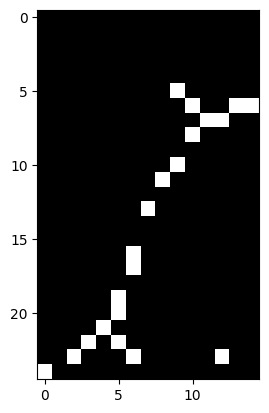

In [17]:
sub_dist = img_skel - dist_index
plt.imshow(sub_dist[125:150, 95:110], 'gray')

In [18]:
conected_comp = skimage.measure.label(sub_dist, connectivity=2)
print(conected_comp[125:150, 95:110])

[[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 21  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 21  0  0 21 21]
 [ 0  0  0  0  0  0  0  0  0  0  0 21 21  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 21  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 24  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 24  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 29  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 34  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 34  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 38  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 38  0  0  0  0  0  0  0

In [19]:
np.unique(conected_comp)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71])

In [20]:
rows = []
cols = []
img0 = np.zeros(img.shape)
for node in graph_skel3.nodes:
    if graph_skel3.degree(node) > 2:
        aux = node_att[node]['center']
        rows.append(aux[0])
        cols.append(aux[1])
    
print(rows, "\n",cols)
print(len(rows))

[53, 68, 97, 126, 130, 132, 142, 146, 188, 217] 
 [221, 188, 142, 231, 209, 106, 133, 99, 57, 43]
10


<IPython.core.display.Javascript object>


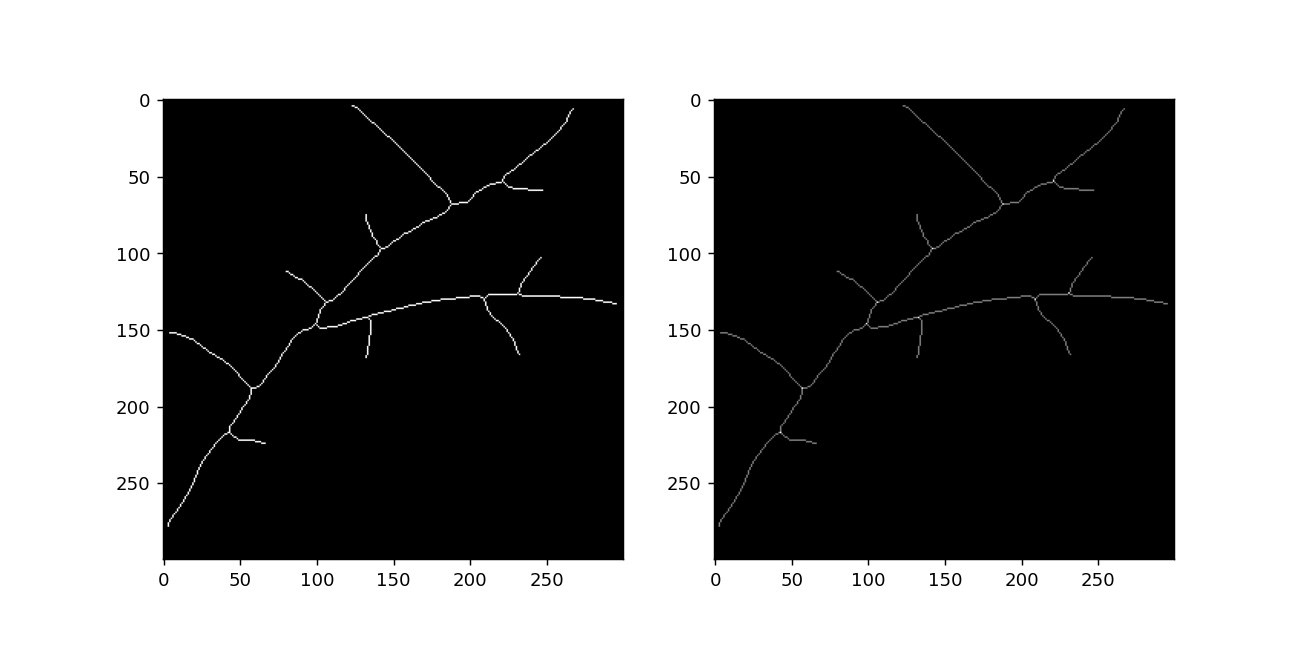

In [21]:
# importando o matplotlib do terminal para fazer uma melhor visualizacao
%matplotlib notebook

img0 = np.zeros(img.shape)
#row, col = center

plt.figure(figsize = (10, 5))
img0[rows, cols] = 255
plt.subplot(121)
plt.imshow(img_skel, 'gray')
plt.subplot(122)
plt.imshow(img_skel * 255 + img0, 'gray')

In [22]:
print(graph_skel3.edges(nbunch = 0, data = True))


print('*****\n',graph_skel3.get_edge_data(0,1)[0]['path'])

[(0, 1, {'path': [(54, 220), (54, 219), (54, 218), (54, 217), (55, 216), (55, 215), (55, 214), (55, 213), (56, 212), (56, 211), (57, 210), (57, 209), (58, 208), (59, 207), (59, 206), (60, 205), (60, 204), (61, 203), (62, 202), (63, 202), (64, 201), (65, 200), (66, 199), (67, 198), (67, 197), (67, 196), (67, 195), (67, 194), (67, 193), (68, 192), (68, 191), (68, 190), (68, 189)], 'length': 37.38477631085023, 'is_branch': False}), (0, 12, {'path': [(54, 222), (55, 223), (56, 224), (57, 225), (57, 226), (57, 227), (58, 228), (58, 229), (58, 230), (58, 231), (58, 232), (58, 233), (58, 234), (58, 235), (58, 236), (58, 237), (59, 238), (59, 239), (59, 240), (59, 241), (59, 242), (59, 243), (59, 244), (59, 245), (59, 246)], 'length': 26.071067811865476, 'is_branch': True}), (0, 11, {'path': [(52, 221), (51, 222), (50, 222), (49, 223), (48, 224), (48, 225), (47, 226), (46, 227), (46, 228), (45, 229), (44, 230), (43, 231), (42, 232), (42, 233), (41, 234), (40, 235), (39, 236), (38, 237), (37, 2

<IPython.core.display.Javascript object>


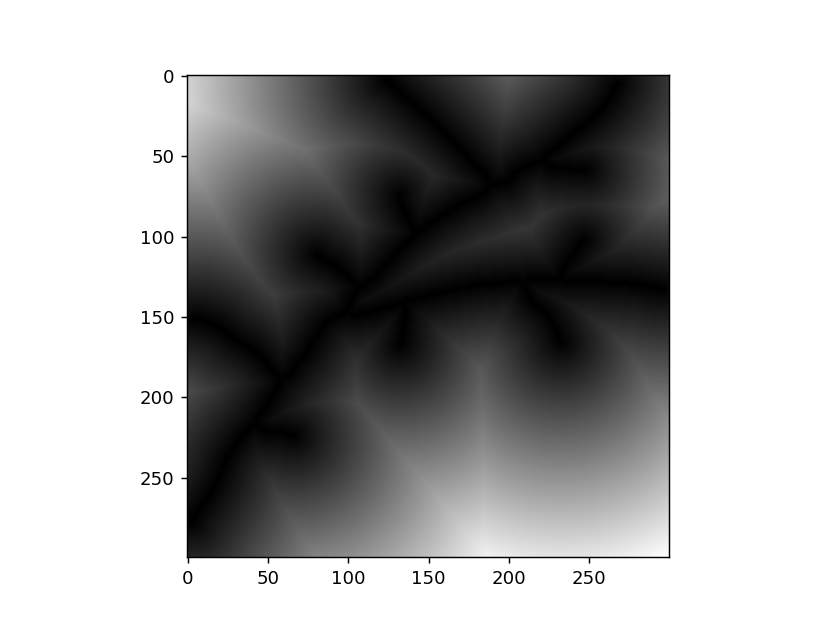

In [23]:
plt.figure()
plt.imshow(img_dist, 'gray')

In [49]:
print(img_graph_skel.dtype)

uint8


<IPython.core.display.Javascript object>


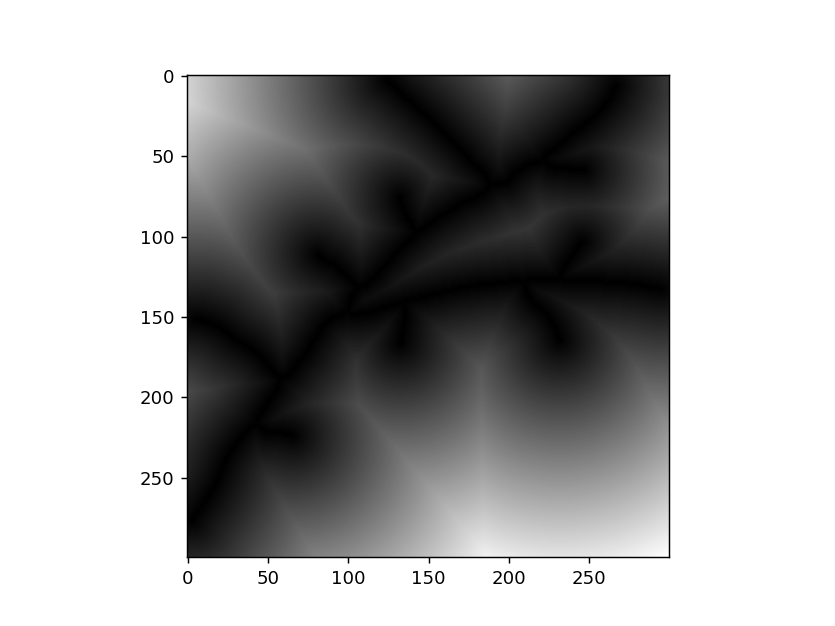

In [25]:
color = (255,255,255)
img_graph_skel = util.graph_to_img(graph_skel3, img_shape = img.shape, node_color = (0,0,0), 
                                   node_pixels_color = (0,0,0),
                                   edge_color = color)
img_graph_skel = transform_nonbinary(img_graph_skel)
img_distancia, indices = distance(1-img_graph_skel, return_indices=True)

plt.figure()
plt.imshow(img_distancia, 'gray')

Função para relacionar os indices das arestas do grafo com os pixeis do vaso

In [26]:
img_id_func = np.zeros(img.shape, dtype = np.uint8)

for row in range(img.shape[0]):
    for col in range(img.shape[1]):
        if img[row, col] > 0 :
            pixel_skel = (indices[0,row, col], indices[1, row, col])
            
            
            for idx, edge in enumerate(graph_skel3.edges, 1):
                row_col = graph_skel3.get_edge_data(edge[0], edge[1])[0]['path']
                if pixel_skel in row_col:
                    #print('entrou aqui')
                    img_id_func[row, col] = idx

        

Plotando a separação dos indices do grafo sobre o esqueleto

In [27]:
img_id = np.zeros(img.shape, dtype = np.uint8)
row, col = np.nonzero(img)
img_id[row, col] = img_id_func[row, col]
print(np.nonzero(img))

(array([  0,   0,   0, ..., 285, 285, 285]), array([116, 117, 118, ...,   2,   3,   4]))


<IPython.core.display.Javascript object>


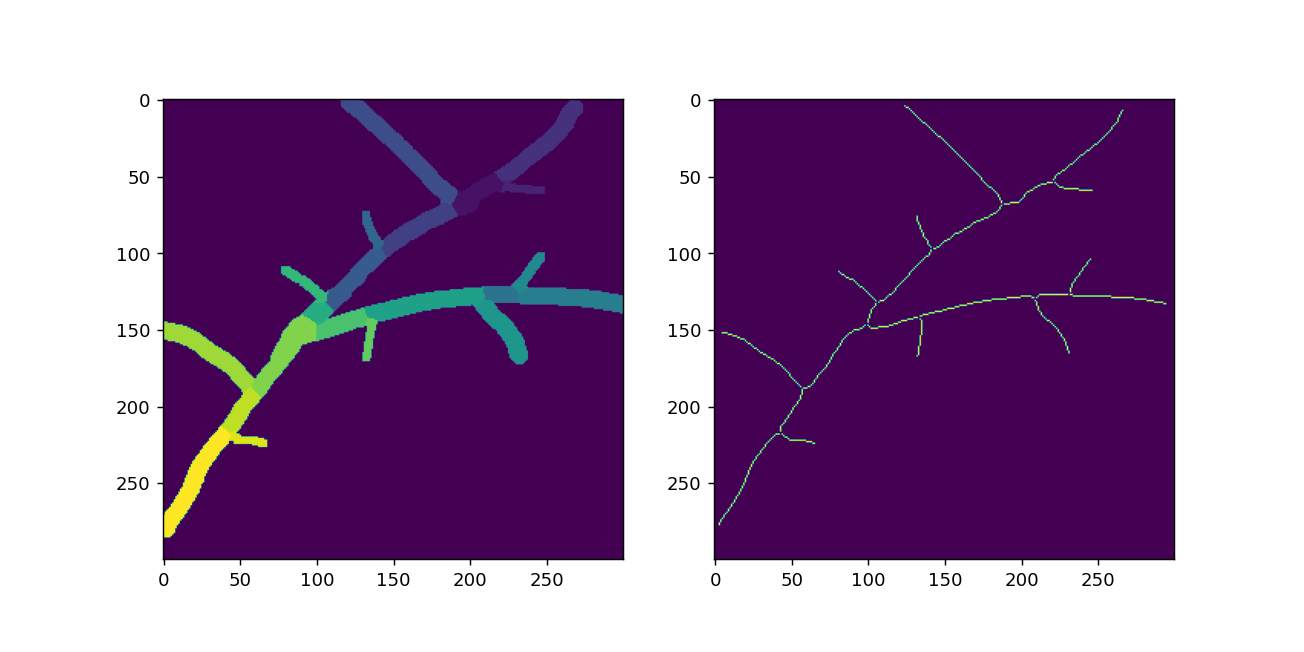

In [28]:
plt.figure(figsize = (10, 5))
plt.subplot(121)
plt.imshow(img_id)

plt.subplot(122)
plt.imshow(img_graph_skel)

# Reunião 30/03/2022

A meta agora é mapear os innerpoints comparando com a imagem de ID's junto com a imagem de distancia que tem pixeis faltando

Para isso, isolei as bordas da imagem de ID's e vou comprar com os indices retornados pela distancia e colocar sobre uma imahgem auxiliar

<IPython.core.display.Javascript object>


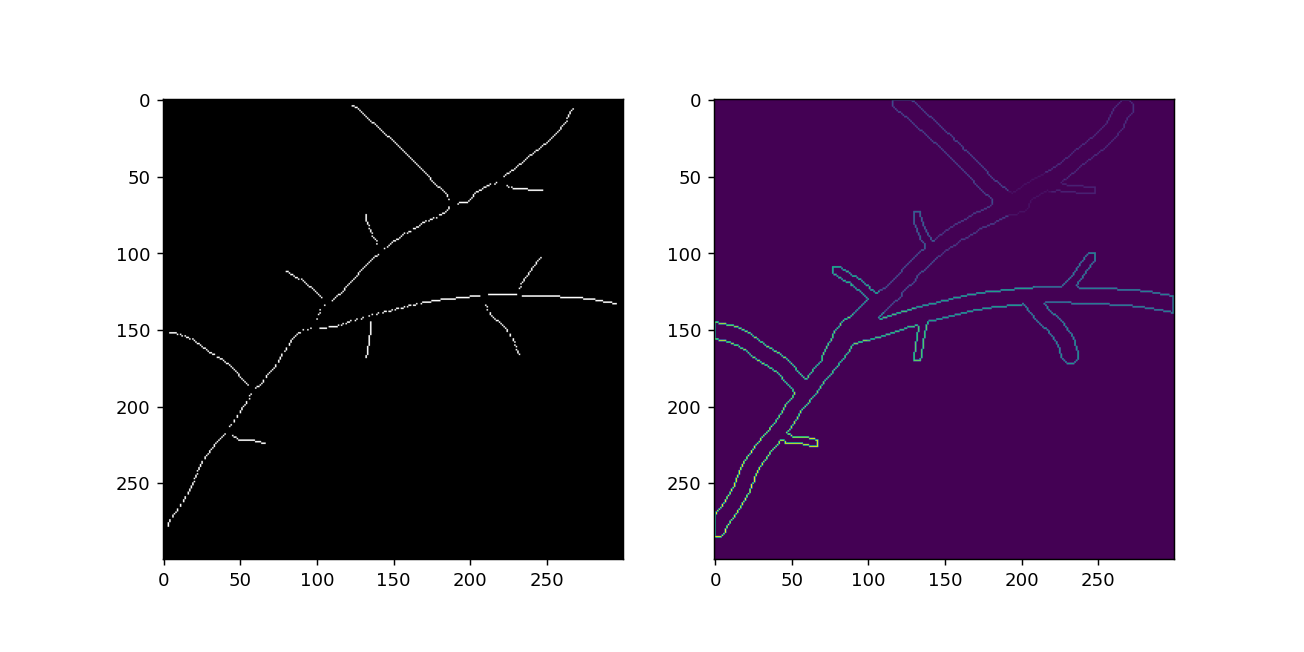

In [29]:
# a variavel index tem os indices associados e a dist_index é o plot dela
row, col = np.nonzero(img_borda)
img_id_borda = np.zeros(img.shape, np.uint8)
img_id_borda[row, col] = img_id[row, col]
plt.figure(figsize = (10, 5))
plt.subplot(121)
plt.imshow(dist_index, 'gray')
plt.subplot(122)
plt.imshow(img_id_borda)

<IPython.core.display.Javascript object>


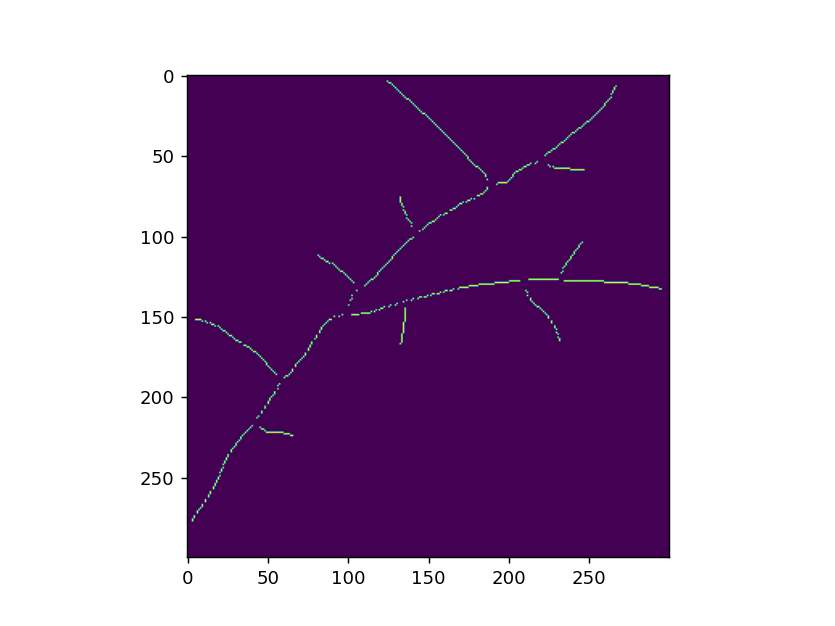

In [30]:
# resetando a variavel para a distancia nova
dist_index[:,:] = 0 
row, col = np.nonzero(img_id_borda)
row, col = indices[0, row, col], indices[1, row, col]
dist_index[row, col] = 1
plt.figure()
plt.imshow(dist_index)

<IPython.core.display.Javascript object>


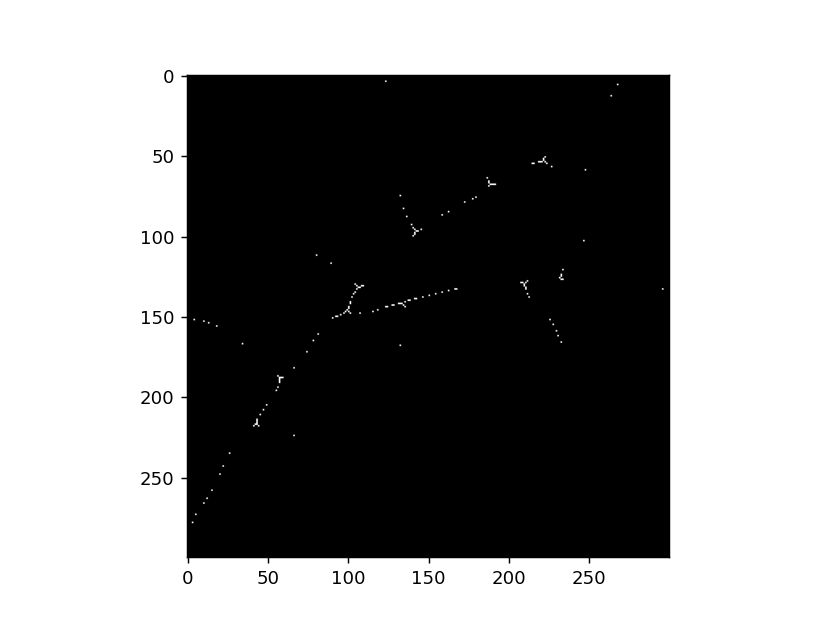

In [31]:
img_inner = np.zeros(img.shape, dtype = np.uint8)
img_inner = img_skel - dist_index 

img_inner = transform_nonbinary(img_inner)


plt.figure()
plt.imshow(img_inner, 'gray')

<IPython.core.display.Javascript object>


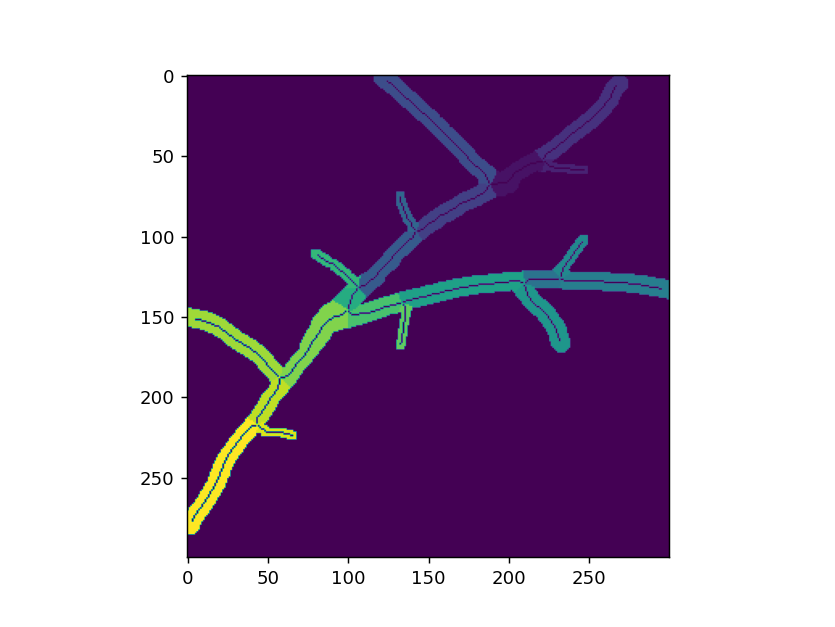

In [32]:
img_rotulo = img_id.copy()
img_rotulo[img_graph_skel > 0] = 0
plt.figure()
plt.imshow(img_rotulo)

Para proxima reunião, fazer a associação do innerpoints com base na imagem de distancia

Mudar a imagem de distancia para a imagem de distancia do esqueleto do grafo, não do esqueleto base

Comparar com vizinhança 8, ou seja, uma matriz 3x3

Com isso, provavelmente aumentará pelo menos um pixel em cada um dos nós de Innerpoints que estamos calculando até então. A ideia de fazer a subtração não está errada.

# o artigo menciona
If a point has associated surface points, neither of which are adjacent to surface voxels of another edge, it is condidered an outer point. An inner point is characterized by either not having any associated surface voxels or by having a surface voxel that is a 26-neighbor of a point that belongs to another edge.

<IPython.core.display.Javascript object>


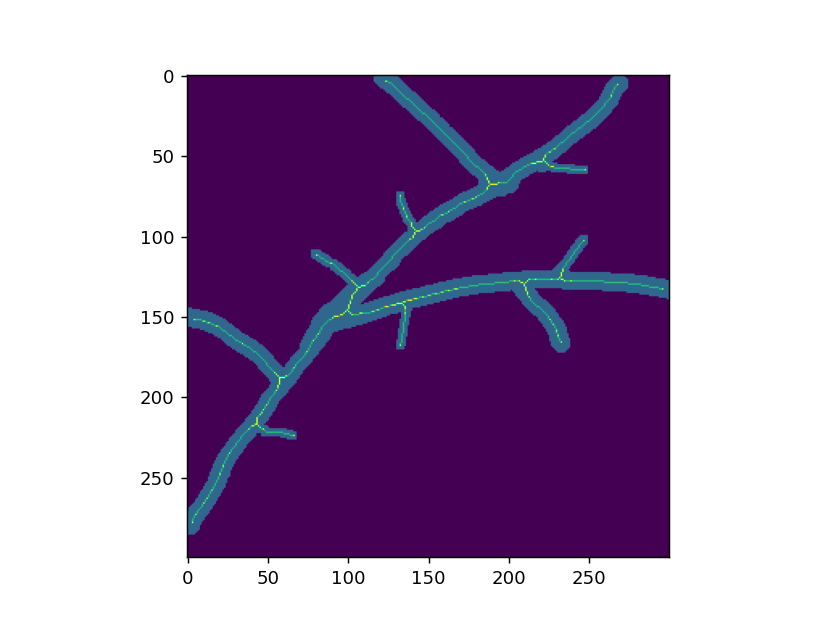

In [33]:

for i in range(img.shape[0] - 1):
    for j in range(img.shape[1] - 1):
        if img_id_borda[i, j] > 0:
            # para baixo
            if img_id_borda[i, j] != img_id_borda[i, j + 1] and img_id_borda[i, j + 1] > 0:
                row, col = indices[0, i, j], indices[1, i, j]
                img_inner[row, col] = 1
            
            # para direita
            elif img_id_borda[i, j] != img_id_borda[i + 1, j] and img_id_borda[i + 1, j] > 0:
                row, col = indices[0, i, j], indices[1, i, j]
                img_inner[row, col] = 1

            # para baixo
            elif img_id_borda[i, j] != img_id_borda[i, j - 1] and img_id_borda[i, j - 1] > 0:
                row, col = indices[0, i, j], indices[1, i, j]
                img_inner[row, col] = 1

            # para esquerda
            elif img_id_borda[i, j] != img_id_borda[i - 1, j] and img_id_borda[i - 1, j] > 0:
                row, col = indices[0, i, j], indices[1, i, j]
                img_inner[row, col] = 1
            #vizinhança 8
            # segundo quadrante
            elif img_id_borda[i, j] != img_id_borda[i - 1, j - 1] and img_id_borda[i - 1, j - 1] > 0:
                row, col = indices[0, i, j], indices[1, i, j]
                img_inner[row, col] = 1
                
            # primeiro quadrante
            elif img_id_borda[i, j] != img_id_borda[i - 1, j + 1] and img_id_borda[i - 1, j + 1] > 0:
                row, col = indices[0, i, j], indices[1, i, j]
                img_inner[row, col] = 1
            
            # terceiro quadrante
            elif img_id_borda[i, j] != img_id_borda[i + 1, j -1] and img_id_borda[i + 1, j -1] > 0:
                row, col = indices[0, i, j], indices[1, i, j]
                img_inner[row, col] = 1
            
            # quarto quadrante
            elif img_id_borda[i, j] != img_id_borda[i + 1, j + 1] and img_id_borda[i + 1, j + 1] > 0:
                row, col = indices[0, i, j], indices[1, i, j]
                img_inner[row, col] = 1
            
            

        
        
plt.figure()          
plt.imshow(img + img_inner + img_skel)
#print(np.unique(img+img_inner+img_skel))

In [34]:
print(indices)

[[[  4   4   4 ...   7   7   7]
  [  4   4   4 ...   7   7   7]
  [  4   4   4 ...   7   7   7]
  ...
  [277 277 277 ... 165 165 165]
  [277 277 277 ... 165 165 165]
  [277 277 277 ... 165 165 165]]

 [[124 124 124 ... 266 266 266]
  [124 124 124 ... 266 266 266]
  [124 124 124 ... 266 266 266]
  ...
  [  3   3   3 ... 231 231 231]
  [  3   3   3 ... 231 231 231]
  [  3   3   3 ... 231 231 231]]]


In [35]:
# existem dois pixeis que faltaram nessas posiçoes
print(img_inner[146, 135])
print(img_skel[147, 135])

0
1


Proxima reunião:

Utilizaremos a imagem de IDS q fizemos anteriormente, com ela, nomeamos os pontos de transição entre um ID e outro, colocando eles em um dicionario para facilitar nossa utilização

Depois de separar os pontos dos IDS, traçaremos uma linha sobre os pontos de ID para encontrar o innerlength, para isso, encontraremos o ponto de intersecção da linha com o esqueleto. 

Depois de encontrar o ponto do esqueleto que esta sobre a linha, faremos a contagem dos pixeis da bifurcação até esse ponto e econtramos o innerlength

<IPython.core.display.Javascript object>


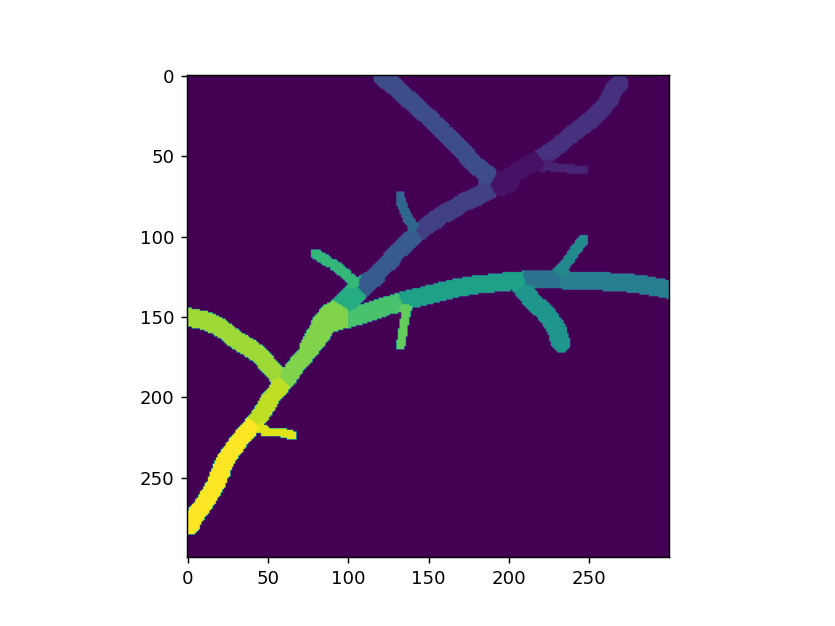

In [36]:
plt.figure()
plt.imshow(img_id)

In [37]:
ponto_importante = []
#ponto_id = dict.fromkeys(np.unique(img_id)[1:])
for row in range(img.shape[0] -1):
    for col in range(img.shape[1]-1):
        if img_id_borda[row, col] > 0:
            # direita
            if img_id_borda[row, col + 1] > 0:# and [row, col] not in ponto_importante:
                if img_id_borda[row, col] != img_id_borda[row, col+1]:
                    ponto_importante.append([row, col])

            # esquerda
            if img_id_borda[row, col - 1] > 0:# and [row, col] not in ponto_importante:
                if img_id_borda[row, col] != img_id_borda[row, col-1]:
                    ponto_importante.append([row, col])

            # baixo
            if img_id_borda[row + 1, col] > 0:# and [row, col] not in ponto_importante:
                if img_id_borda[row, col] != img_id_borda[row+1, col]:
                    ponto_importante.append([row, col])

            # acima
            if img_id_borda[row-1, col] > 0:# and [row, col] not in ponto_importante:
                if img_id_borda[row, col] != img_id_borda[row-1, col]:
                    ponto_importante.append([row, col])

            # primeiro quadrante    
            if img_id_borda[row-1, col + 1] > 0:# and [row, col] not in ponto_importante:
                if img_id_borda[row, col] != img_id_borda[row-1, col+1]:
                    ponto_importante.append([row, col])

            #segundo quadrante
            if img_id_borda[row-1, col - 1] > 0:# and [row, col] not in ponto_importante:
                if img_id_borda[row, col] != img_id_borda[row-1, col-1]:
                    ponto_importante.append([row, col])

            # terceiro quadrante
            if img_id_borda[row+1, col - 1] > 0:# and [row, col] not in ponto_importante:
                if img_id_borda[row, col] != img_id_borda[row+1, col-1]:
                    ponto_importante.append([row, col])

            # quarto quadrante        
            if img_id_borda[row+1, col + 1] > 0:# and [row, col] not in ponto_importante:
                if img_id_borda[row, col] != img_id_borda[row+1, col+1]:
                    ponto_importante.append([row, col])

In [38]:
ponto_id = dict.fromkeys(np.unique(img_id)[1:], None)
print(ponto_id)


{1: None, 2: None, 3: None, 4: None, 5: None, 6: None, 7: None, 8: None, 9: None, 10: None, 11: None, 12: None, 13: None, 14: None, 15: None, 16: None, 17: None, 18: None, 19: None, 20: None, 21: None}


In [39]:
ponto_id = dict.fromkeys(np.unique(img_id)[1:], None)
#print(ponto_id)
for i in ponto_importante:
    if ponto_id[img_id_borda[i[0], i[1]]] is None:
        ponto_id[img_id_borda[i[0], i[1]]] = [i]
    else:
        ponto_id[img_id_borda[i[0], i[1]]].append(i)#= ponto_id[img_id_borda[i[0], i[1]]], i
        #ponto_id.update({img_id_borda[i[0], i[1]]: [ponto_id[img_id_borda[i[0], i[1]]], i]})
        
for i in ponto_id:
    print(i, ':', ponto_id[i])
#ponto_id.update({1: (ponto_id[1], [1, 0])})
#print(ponto_id[2] is None)
#print(ponto_id[img_id_borda[]])

1 : [[48, 215], [60, 192], [60, 219], [75, 192]]
2 : [[52, 229], [52, 229], [53, 227], [60, 220]]
3 : [[47, 216], [51, 230], [52, 228], [52, 228]]
4 : [[68, 181], [76, 191], [91, 144], [102, 146]]
5 : [[59, 191], [67, 181]]
6 : [[98, 136], [103, 145], [124, 108], [138, 111]]
7 : [[92, 143], [97, 137]]
8 : [[122, 209], [122, 226], [132, 216], [132, 230]]
9 : [[123, 238], [132, 231]]
10 : [[121, 227], [122, 237]]
11 : [[133, 215], [136, 204]]
12 : [[122, 208], [135, 203], [136, 131], [144, 140]]
13 : [[133, 97], [139, 91], [139, 110], [142, 107]]
14 : [[125, 107], [132, 98]]
15 : [[136, 130], [143, 108], [148, 129], [157, 100]]
16 : [[145, 139], [148, 130]]
17 : [[140, 90], [157, 99], [182, 59], [194, 64]]
18 : [[181, 58], [190, 51]]
19 : [[191, 52], [195, 63], [212, 38], [214, 50]]
20 : [[215, 49], [222, 43]]
21 : [[213, 37], [223, 42]]


A aresta 2 tem um problema, ta mostrando que tem 4 pontos, mas 1 dos pontos é o mesmo ponto e alem disso, tem um pixel a mais, que é vizinho mas está no mesmo indice

In [40]:
row, col = [],[]
for i in range(len(ponto_importante)):
    row.append(ponto_importante[i][0])
    col.append(ponto_importante[i][1])
#print(row, col)

In [41]:
img_aux = img_id_borda.copy()
img_aux[row, col] = 40

<IPython.core.display.Javascript object>


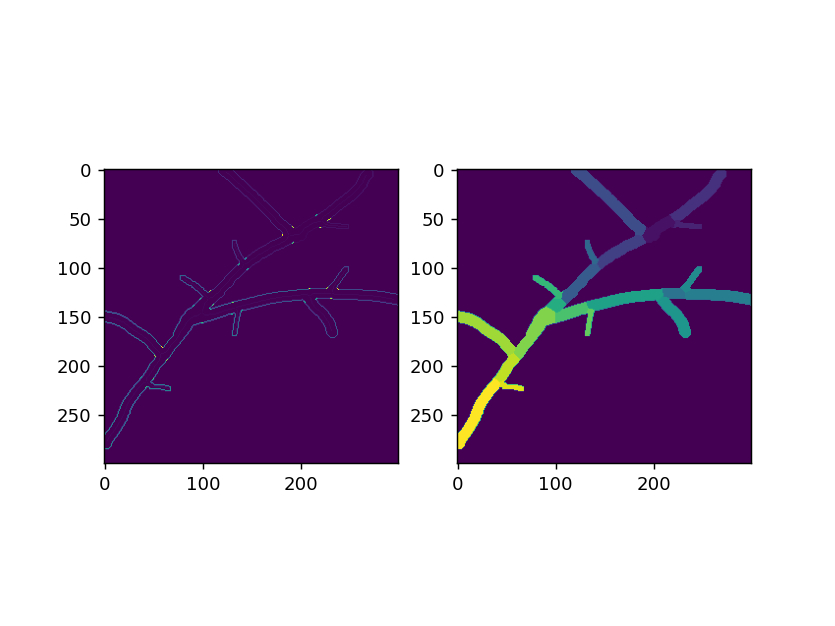

In [42]:
plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(img_aux + img_graph_skel)
plt.subplot(122)
plt.imshow(img_id)

Pegando a aresta 20, pois ela esta com 2 pontos exatos

[222, 43]


<IPython.core.display.Javascript object>


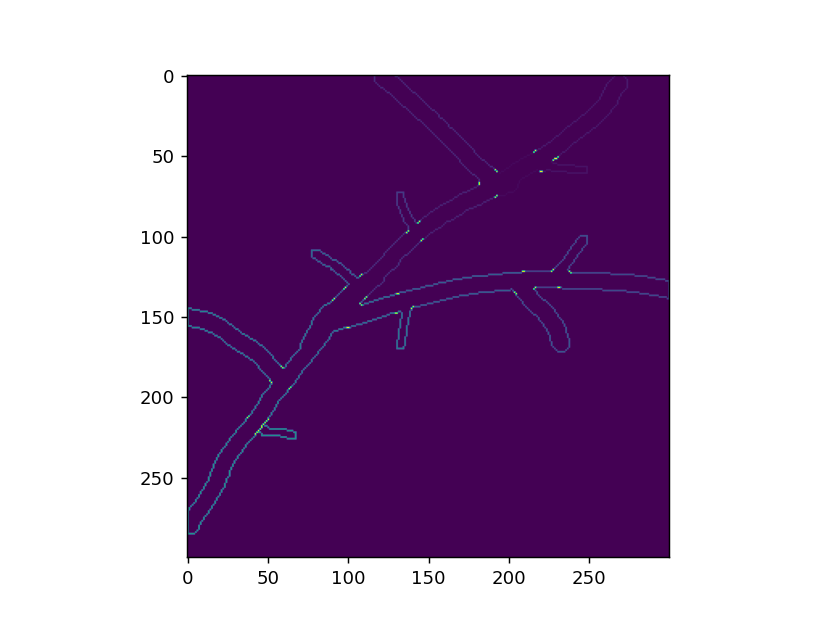

In [43]:
pontos = ponto_id[20]
print(pontos[1])
rr, cc = skimage.draw.line(pontos[0][0], pontos[0][1], pontos[1][0], pontos[1][1])
img_aux[rr, cc] = 40
plt.figure()
plt.imshow(img_aux)

A partir daqui é calcular o tamanho do ponto central até o pixel da linha, isso é feito fazendo a contagem de pixeis do esqueleto do centro até a linha? ou tem alguma formula exata para isso?

Mudando novamente a metologia, basicamente a ideia dos IDS podem ter os problemas assim como no ramo 2 acima, com isso, teremos que mudar um pouco a ideia dos IDS e fazer com que identifique os pixeis mais proximos do ponto central da bifurcação, com isso, tem um print 'bifurcacaoIDnova.png' que demonstra um codigo de como fazer isso ai, ai com isso, conseguimos identificar os pixeis para traçar a linha da bifurcação

Para calcular o length que estamos buscando, tem um print 'bifurcacaoInner.png' explicando emlhor um codigo de como fazer isso ai

pseudo-codigo que o Professor escreveu

k=15

len(pontos_bif)# os pontos de bifurcação

len(pontos_borda)# os pontos de borda

m_dist = scipy.cdist(pontos_bif, pontos_borda)

dict_close = {}

for idx_bif in range(len(ponto_bif)):
    
    ind = np.argsort(m_dist[0])
    
    pontos_proximos = ind[0:k]
    
    dict_close[idx_bif] = pontos_proximos

<IPython.core.display.Javascript object>


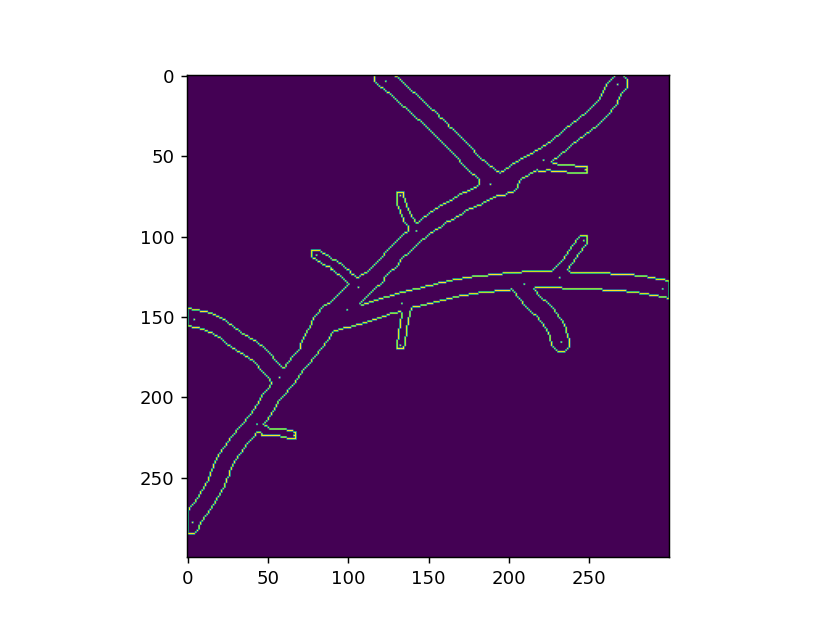

In [44]:
#pontos_bif = []
img_bif = np.zeros(img.shape, np.uint8)

for ponto in graph_skel3.nodes:
    ponto_bif = graph_skel3.nodes(data=True)[ponto]['center']
    img_bif[ponto_bif] = 1
#print(pontos_bif)
#img_bif[pontos_bif] = 1

plt.figure()
plt.imshow(img_bif + img_borda)

<IPython.core.display.Javascript object>


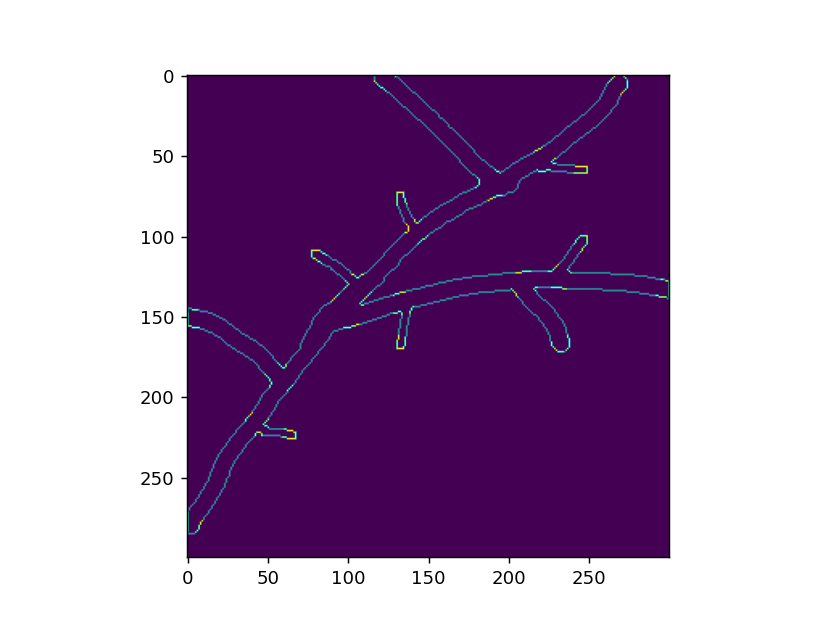

In [45]:
from scipy.spatial.distance import cdist

img_print = np.zeros(img.shape)
pontos_bif = []
pontos_borda = []

for ponto in graph_skel3.nodes:
    pontos_bif.append(graph_skel3.nodes(data=True)[ponto]['center'])
    
pontos_bif = np.array(pontos_bif)

for i in range(img_borda.shape[0]):
    for j in range(img_borda.shape[1]):
        if img_borda[i, j] == 1:
            pontos_borda.append([i, j])

pontos_borda = np.array(pontos_borda)

k = 20

m_dist = cdist(pontos_bif, pontos_borda)

ind = np.argsort(m_dist, axis = 1)

k_pontos_proximos = pontos_borda[ind[:, :k], :]

dict_close = {}

for idx_bif in range(len(pontos_bif)):
    pontos_proximos = pontos_borda[ind[idx_bif, :k], :]
    dict_close[idx_bif] = pontos_proximos
    for i in pontos_proximos:
        img_print[i[0], i[1]] = 1

plt.figure()
plt.imshow(img_print+img_borda)

In [46]:
print(graph_skel3.nodes(data=True)[0])

{'pixels': [(53, 221)], 'center': (53, 221), 'type': 0, 'ndim': 2, 'branches': [(54, 220), (54, 222), (52, 221)], 'old_id': 0, 'radius': 6.082762530298219}


In [47]:
from scipy.spatial import KDTree
ponto_aux = [53,221]

distance, index = KDTree(pontos_borda).query(ponto_aux)

print(distance)

print(index)

print(pontos_borda[KDTree(pontos_borda).query(ponto_aux)[1]])

5.0990195135927845
262
[ 54 226]


<IPython.core.display.Javascript object>


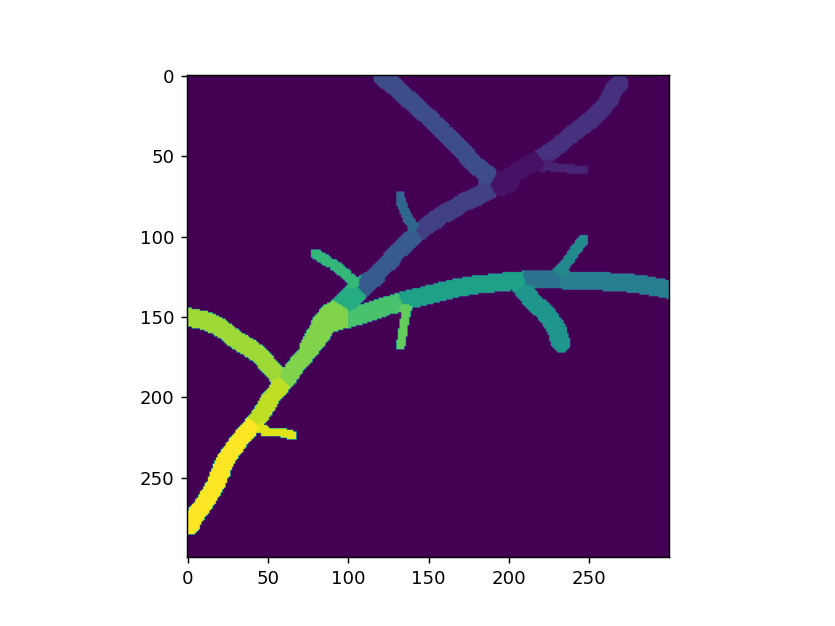

In [48]:
plt.figure()
img_ss = img_borda.copy()
img_ss[53,221] = 5
plt.imshow(img_id)